In [116]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

In [117]:
# Store filepath in a variable
credit_data_csv = "Resources/credits.csv"
title_data_csv = "Resources/titles.csv"

In [118]:
# load data into a pandas dataframe
credit_data = pd.read_csv(credit_data_csv)
title_data = pd.read_csv(title_data_csv)

In [119]:
# merge the two datasets into a single dataframe
netflix_complete = pd.merge(title_data, credit_data, how="left", on=["id"])
netflix_complete.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,person_id,name,character,role
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,48,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN,NaN,NaN,NaN,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0,27.612,8.2,3748.0,Robert De Niro,Travis Bickle,ACTOR
2,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0,27.612,8.2,14658.0,Jodie Foster,Iris Steensma,ACTOR
3,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0,27.612,8.2,7064.0,Albert Brooks,Tom,ACTOR
4,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0,27.612,8.2,3739.0,Harvey Keitel,Matthew 'Sport' Higgins,ACTOR


In [129]:
moviesDF = netflix_complete.drop_duplicates(subset = ['title'])
moviesDF.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,person_id,name,character,role
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,48,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN,NaN,NaN,NaN,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0,27.612,8.2,3748.0,Robert De Niro,Travis Bickle,ACTOR
38,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['comedy', 'fantasy']",['GB'],NaN,tt0071853,8.2,530877.0,18.216,7.8,11472.0,Graham Chapman,King Arthur / Voice of God / Middle Head / Hic...,ACTOR
86,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,['comedy'],['GB'],NaN,tt0079470,8.0,392419.0,17.505,7.8,11472.0,Graham Chapman,Wise Man #2 / Brian Cohen / Biggus Dickus,ACTOR
108,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,['horror'],['US'],NaN,tt0070047,8.1,391942.0,95.337,7.7,1700.0,Ellen Burstyn,Chris MacNeil,ACTOR


In [131]:
# Create a DataFrame that filters the data on only the genre horror for the total # of horror movies
horrorMoviesDF = moviesDF.loc[moviesDF['genres'].str.contains('horror')==True]
horrorMoviesDF['title'].count()

374

In [132]:
#Sort Horror Movies by Popularity Score, reset index, and replace Nan with 0.
popular_horrorDF = horrorMoviesDF.sort_values("tmdb_popularity", ascending=False)
popular_horrorDF = popular_horrorDF.reset_index(drop=True)
popular_horrorDF = popular_horrorDF.fillna(0)
popular_horrorDF.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,person_id,name,character,role
0,ts9,The Walking Dead,SHOW,Sheriff's deputy Rick Grimes awakens from a co...,2010,TV-MA,46,"['action', 'drama', 'scifi', 'thriller', 'horr...",['US'],11.0,tt1520211,8.2,945125.0,773.190,8.1,7302.0,Norman Reedus,Daryl Dixon,ACTOR
1,ts225855,All of Us Are Dead,SHOW,A high school becomes ground zero for a zombie...,2022,TV-MA,61,"['action', 'scifi', 'thriller', 'drama', 'fant...",['KR'],1.0,tt14169960,7.5,41393.0,678.734,8.5,958720.0,Park Ji-hu,Nam On-jo,ACTOR
2,ts21247,The Vampire Diaries,SHOW,The story of two vampire brothers obsessed wit...,2009,TV-14,42,"['scifi', 'drama', 'thriller', 'fantasy', 'hor...",['US'],8.0,tt1405406,7.7,310776.0,463.661,8.3,4416.0,Paul Wesley,Stefan Salvatore,ACTOR
3,tm946869,Texas Chainsaw Massacre,MOVIE,"In this sequel, influencers looking to breathe...",2022,R,83,"['thriller', 'crime', 'horror']",['US'],0.0,tt11755740,4.8,45810.0,437.842,5.1,885964.0,Sarah Yarkin,Melody,ACTOR
4,tm1120902,The Privilege,MOVIE,A wealthy teen and his friends attending an el...,2022,0,107,"['scifi', 'thriller', 'drama', 'horror']",['DE'],0.0,tt14637290,4.6,3900.0,415.203,5.1,592752.0,Max Schimmelpfennig,Finn Bergmann,ACTOR


In [133]:
popular_horrorDF.describe()

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,person_id
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,3.740000e+02
mean,2016.109626,82.516043,0.676471,5.731016,43220.473262,43.125455,6.318984,2.380032e+05
std,6.228126,33.833348,1.534110,1.768021,98920.971231,78.833363,1.497554,4.185847e+05
min,1973.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,2015.000000,52.000000,0.000000,5.100000,1987.500000,9.920000,5.600000,8.758500e+03
50%,2018.000000,91.000000,0.000000,5.800000,9762.000000,19.242500,6.400000,5.095300e+04
75%,2020.000000,103.000000,1.000000,6.800000,41479.250000,43.769250,7.300000,1.847780e+05
max,2022.000000,196.000000,15.000000,9.000000,989090.000000,773.190000,10.000000,2.266522e+06


In [134]:
popular_horrorDF.dtypes

id                       object
title                    object
type                     object
description              object
release_year              int64
age_certification        object
runtime                   int64
genres                   object
production_countries     object
seasons                 float64
imdb_id                  object
imdb_score              float64
imdb_votes              float64
tmdb_popularity         float64
tmdb_score              float64
person_id               float64
name                     object
character                object
role                     object
dtype: object

In [135]:
popular_horrorDF[["title", "release_year", "tmdb_popularity"]].head(10)

,title,release_year,tmdb_popularity
0,The Walking Dead,2010,773.190
1,All of Us Are Dead,2022,678.734
2,The Vampire Diaries,2009,463.661
3,Texas Chainsaw Massacre,2022,437.842
4,The Privilege,2022,415.203
5,Supernatural,2005,406.666
6,Two,2021,317.060
7,It Follows,2015,278.419
8,Legacies,2018,270.461
9,Stranger Things,2016,249.853


In [136]:
horror_popularity_average = popular_horrorDF['tmdb_popularity'].mean()
highestRatedTMDB = popular_horrorDF.iloc[0,1]
lowestRatedTMDB = popular_horrorDF[popular_horrorDF['tmdb_popularity'] == popular_horrorDF['tmdb_popularity'].min()]
lowestRatedTMDB = lowestRatedTMDB.iloc[0,1]

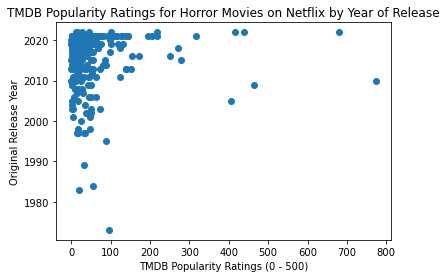

<Figure size 432x288 with 0 Axes>

In [137]:
x_values = popular_horrorDF["tmdb_popularity"]
y_values = popular_horrorDF["release_year"]

plt.scatter(x_values, y_values)
plt.title("TMDB Popularity Ratings for Horror Movies on Netflix by Year of Release")
plt.xlabel("TMDB Popularity Ratings (0 - 500)")
plt.ylabel("Original Release Year")
plt.show()
plt.savefig("./Images/TMDBPopularity_Horror.png")


In [139]:
print(f"The total number of horror titles (Includes Movies and Shows) in our dataset is {horrorMoviesDF['title'].count()}.")
print(f"According to the TMBD Popularity ratings, the highest rated title in the horror genre is {highestRatedTMDB}.")
print(f"According to TMDB Popularity ratings, the lowest rated title in the horror genre is {lowestRatedTMDB}.")
print(f"The average TMDB Popularity rating for horror title on Netflix is {horror_popularity_average}.")

The total number of horror titles (Includes Movies and Shows) in our dataset is 374.
According to the TMBD Popularity ratings, the highest rated title in the horror genre is The Walking Dead.
According to TMDB Popularity ratings, the lowest rated title in the horror genre is El cartel 2 - La guerra total.
The average TMDB Popularity rating for horror title on Netflix is 43.125455457219246.
